In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_comments_sample_CT_sample.csv')
len(df)

138020

In [4]:
df.head()

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,nickname_used,Adjectives,Verbs,Nouns,Descriptors_parsed,Verbs_parsed,Relation,Valence,Arousal,Dominance
0,e2r5zm9,Yeah but saying great things about America isn...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['great', 'great', 'great', 'hard', 'great', '...","['say', '’', '’', 'care', 'ignore', 'gon', 'ig...","['thing', 'rule', 'thing', 'norm', 'thing', 't...","['advice', 'name', 'about', 'back']","['attack', 'follow', 'be', 'pull']","['dobj', 'nsubj', 'nmod', 'nsubj', 'dep']",0.555477,0.487815,0.545631
1,e2r6364,Let's be clear about this: A conservative col...,politics,t1,Q76,['Obama'],NaN,male,African Americans,United States of America,...,False,"['clear', 'conservative', 'halcyon', 'black', ...","['let', 'be', 'long', 'think', 'succeed', 'rem...","['columnist', 'day', 'part', 'name', 'month', ...",[],['succeed'],"['dep', 'appos']",0.569233,0.402488,0.530744
2,e2r63x5,"NPD isn't actually a part of the current DSM, ...",politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,"['current', 'proud', 'great']","['mean', 'run', 'think', 'be', 'think', 'see']","['part', 'name', 'personality', 'disorder', 'd...",[],['be'],['nsubj'],0.615875,0.485125,0.547750
3,e2r6fbl,You can thank [NAME] admin and Republicans for...,news,t3,Q207,['Bush'],NaN,male,NaN,United States of America,...,False,['difficult'],"['thank', 'make', 'have', 'discharge']","['name', 'admin', 'student', 'loan']",[],[],['nmod'],0.643857,0.405714,0.555286
4,e2r6x02,"But, they'll have to face [NAME] in the USA. /s",canada,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,False,[],"['have', 'face']",['name'],[],['face'],['dobj'],0.633667,0.287333,0.487000


In [5]:
df.describe()

,created_utc,Valence,Arousal,Dominance
count,2.489000e+03,138020.000000,138020.000000,138020.000000
mean,1.553704e+09,0.320649,0.250630,0.301150
std,1.385805e+07,0.203251,0.159317,0.190237
min,1.530449e+09,0.000000,0.000000,0.000000
25%,1.541989e+09,0.158104,0.124105,0.149122
50%,1.553557e+09,0.203466,0.161172,0.193376
75%,1.565835e+09,0.551417,0.426157,0.515000
max,1.577798e+09,0.938000,0.930000,0.898000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

## Which are the most common subreddits?

In [29]:
df.groupby('subreddit').size().sort_values().tail(10)

subreddit
australia         1089
europe            1560
unitedkingdom     1936
Conservative      2043
Libertarian       2115
canada            2836
neoliberal        3496
news              5624
The_Donald       16853
politics         97213
dtype: int64

<Axes: xlabel='subreddit'>

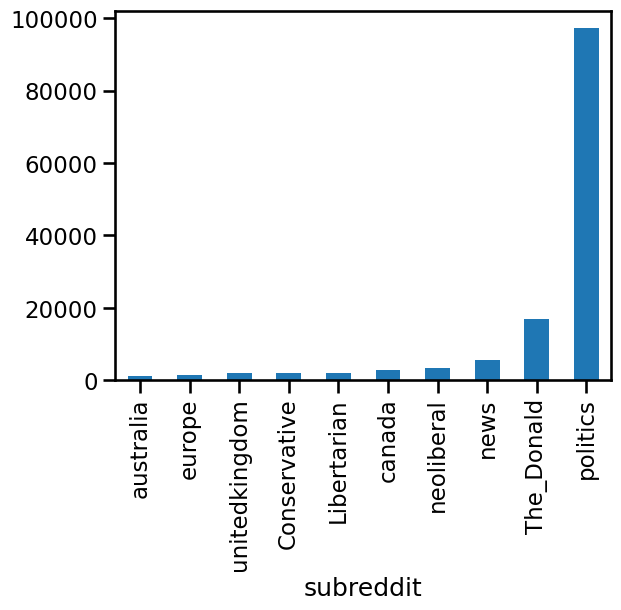

In [30]:
df.groupby('subreddit').size().sort_values().tail(10).plot(kind = 'bar')

Text(0.5, 1.0, 'Number of Comments by Subreddit')

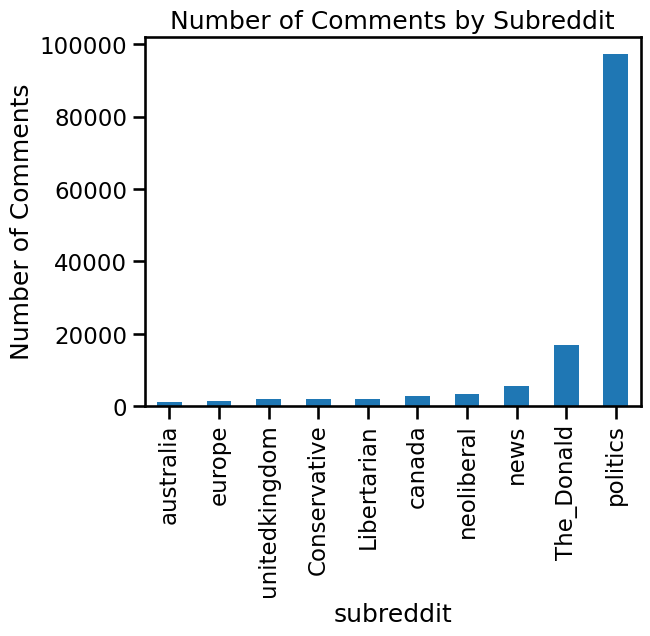

In [31]:
ax = df.groupby('subreddit').size().sort_values().tail(10).plot(kind = 'bar')
ax.set_ylabel('Number of Comments')
ax.set_title('Number of Comments by Subreddit')

The title is useful in presentations, but not so much in papers/reports where you can have this in the caption. But, if you have a figure with multiple subplots, this might help.

In [32]:
df.groupby('origin').size().sort_values().tail(10)

origin
New Zealand                    235
Benin                          238
Germany                        334
Malta                          417
India                          811
Australia                     1042
Canada                        2552
Russia                        2632
United Kingdom                2647
United States of America    123219
dtype: int64

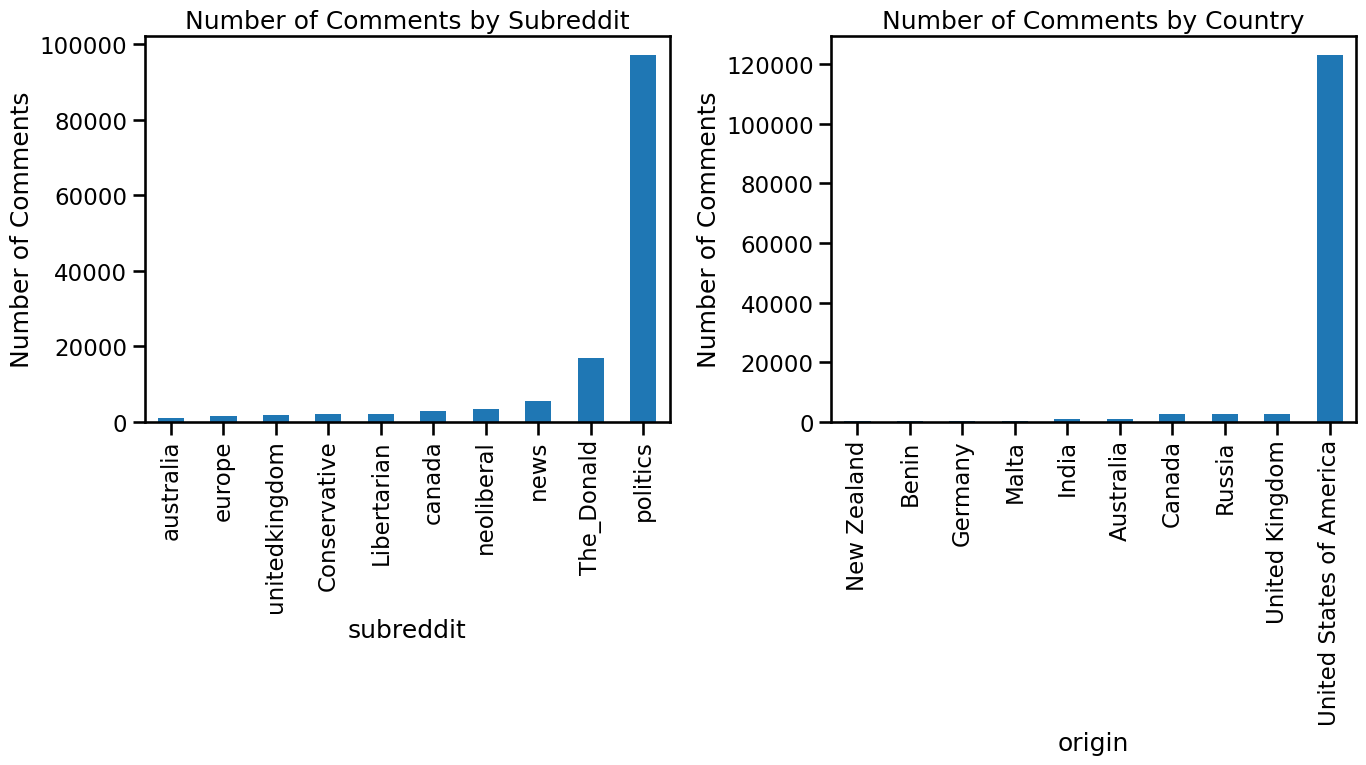

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 8))

df.groupby('subreddit').size().sort_values().tail(10).plot(kind = 'bar', ax = ax[0])
ax[0].set_ylabel('Number of Comments')
ax[0].set_title('Number of Comments by Subreddit')

ax[1] = df.groupby('origin').size().sort_values().tail(10).plot(kind = 'bar', ax = ax[1])
ax[1].set_ylabel('Number of Comments')
ax[1].set_title('Number of Comments by Country')

plt.tight_layout()

this is a long-tailed distribution; A lot of real-world data follows this pattern. Let's try log-scaling the y-axis.

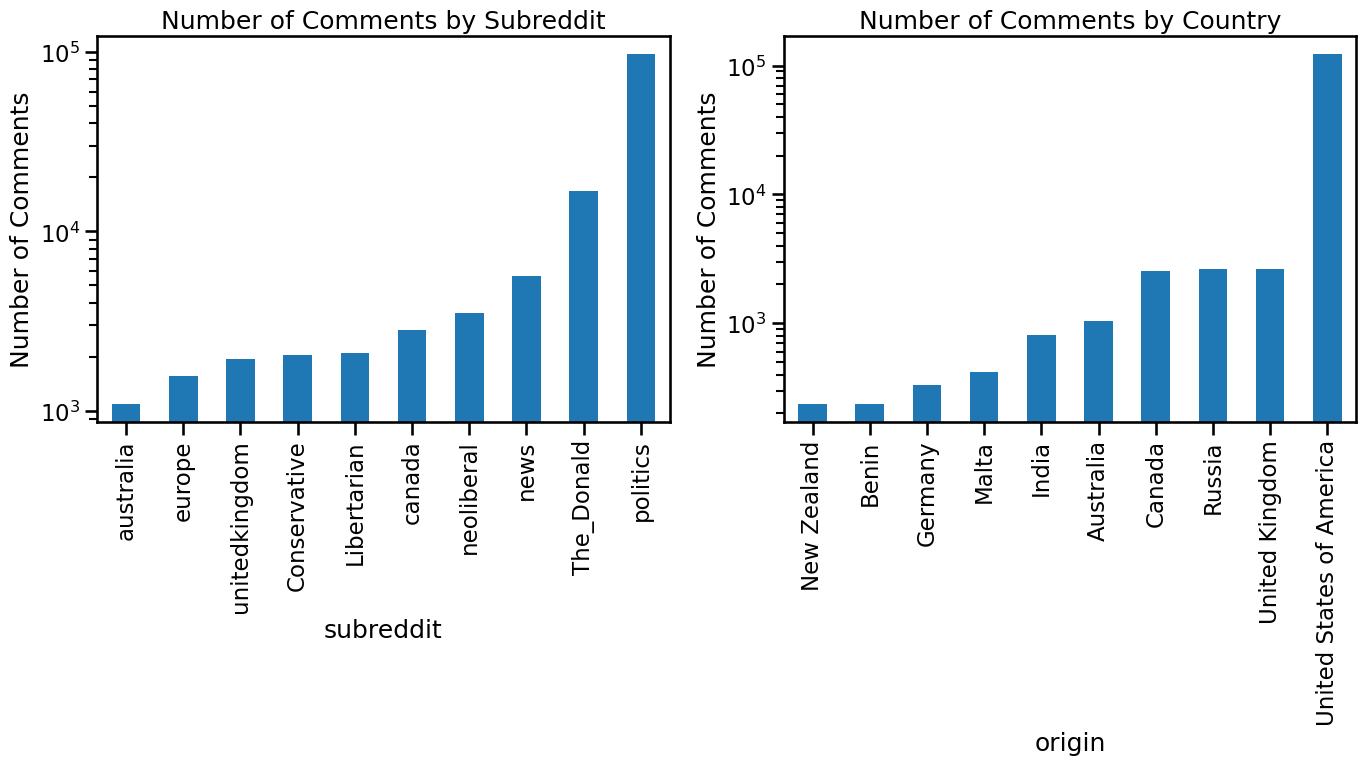

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 8))

df.groupby('subreddit').size().sort_values().tail(10).plot(kind = 'bar', ax = ax[0])
ax[0].set_ylabel('Number of Comments')
ax[0].set_title('Number of Comments by Subreddit')
ax[0].set_yscale('log')

ax[1] = df.groupby('origin').size().sort_values().tail(10).plot(kind = 'bar', ax = ax[1])
ax[1].set_ylabel('Number of Comments')
ax[1].set_title('Number of Comments by Country')
ax[1].set_yscale('log')

plt.tight_layout()

It's now a little easier to see the pattern among the second-largest Subreddits and Countries.

## Let's see how long the comments are 

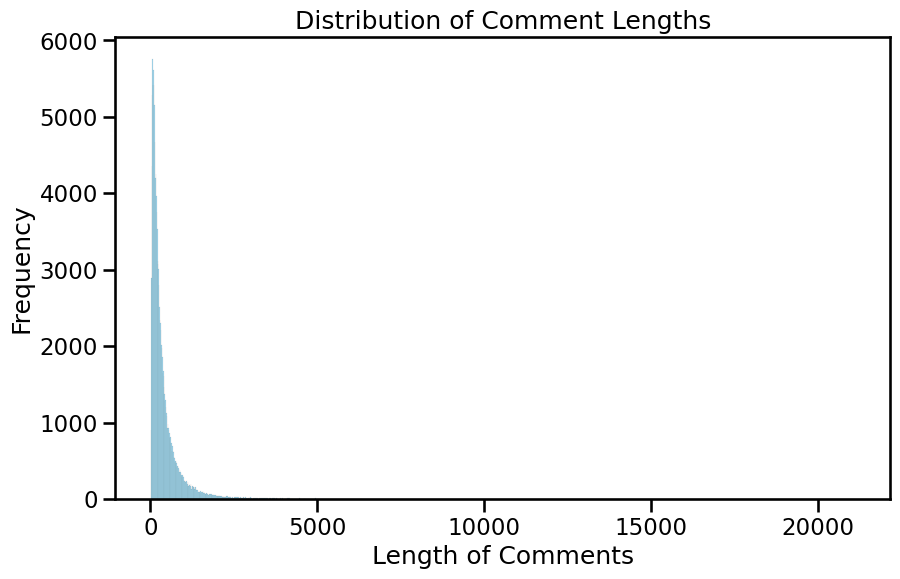

In [14]:
# Display distribution of comments lengths
df['text_length'] = df['body'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], color='skyblue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()

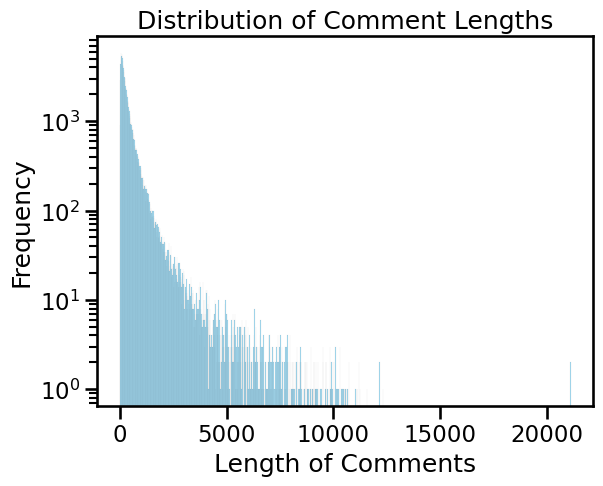

In [13]:
# this is a bit hard to make sense of; let's try and logscale the y-axis again
sns.histplot(df['text_length'], color='skyblue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

## Let's see the most common words in comments

In [17]:
# we'll use a sample for this
df_sample = df.sample(10000)

In [20]:
from collections import Counter
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

# Tokenize the tweets
tokens = [word_tokenize(body) for body in df_sample['body']]
all_words = [word for sublist in tokens for word in sublist]

# Filter out punctuation
filtered_words = [word.lower() for word in all_words if word.isalnum()]

# Filter out stopwords
filtered_words = [word.lower() for word in filtered_words if word not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Display the top 10 most common words
top_words = word_freq.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
print("Top 10 Most Common Words in Comments:")
print(top_words_df)

Top 10 Most Common Words in Comments:
        Word  Frequency
0       name      19826
1      trump       4328
2     people       3425
3      would       2759
4       like       2489
5  president       2097
6        one       1773
7       even       1618
8      think       1614
9        get       1415


### why do you think we have 'name' as the top word?